# Cryptocurrency [ETH/USDT] prediction with RNN Neural Network Artificial Intelligence\:

Cryptocurrency [ETH/USDT] prediction with RNN Neural Network Artificial Intelligence - Emirhan BULUT
I developed Cryptocurrency [ETH/USDT] prediction with RNN Neural Network software with Artificial Intelligence. I predicted the fall on February 24, 2022 with 98.21% accuracy in the ETH/USDT pair. '0.03979729297154955' MAE Score, '0.0023235646943942415' MSE Score, 98.35% Accuracy Question software has been completed.

The ETH/USDT pair forecast for February 24, 2022 was correctly forecasted based on data from Binance.

Software codes and information are shared with you as open source code free of charge on GitHub and My Personal Web Address.

Happy learning!

Emirhan BULUT

Senior Artificial Intelligence Engineer and Inventor


###**The coding language used:**

`Python 3.9.8`

###**Libraries Used:**

`Tensorflow - Keras`

`NumPy`

`Matplotlib`

`Pandas`

`Scikit-learn (SKLEARN)`

<img class="fit-picture"
     src="https://raw.githubusercontent.com/emirhanai/Cryptocurrency-ETH-USDT-prediction-with-RNN-Neural-Network-Artificial-Intelligence/main/ETH-USDT%20with%20RNN%20Neural%20Network%20Artificial%20Intelligence.png"
     alt="Cryptocurrency [ETH/USDT] prediction with RNN Neural Network Artificial Intelligence- Emirhan BULUT">
     
### **Developer Information:**

Name-Surname: **Emirhan BULUT**

Contact (Email) : **emirhan.bulut@turkiyeyapayzeka.com**

LinkedIn : **[https://www.linkedin.com/in/artificialintelligencebulut/][LinkedinAccount]**

[LinkedinAccount]: https://www.linkedin.com/in/artificialintelligencebulut/

Kaggle: **[https://www.kaggle.com/emirhanai][Kaggle]**

Official Website: **[https://www.emirhanbulut.com.tr][OfficialWebSite]**

[Kaggle]: https://www.kaggle.com/emirhanai

[OfficialWebSite]: https://www.emirhanbulut.com.tr




```Prediction: 
-0.04899706 equeals of 2608.594277 USDT
Real ETH Value (for 2/24/2022) is 2562.79248 
Test Accuracy is %98.21```



In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [117]:
data = pd.read_csv("/content/ETH-USD (2).csv")
data = data.iloc[:,0:6]
y = data.loc[:,['Close']]
data = data.drop(['Close'],axis='columns')
print(data.head(5))

        Date         Open         High          Low       Volume
0  2/23/2022  2639.447021  2741.368408  2587.412842  13382637240
1  2/22/2022  2572.898682  2648.916748  2510.678711  16360200507
2  2/21/2022  2627.665527  2752.458496  2568.254395  18646392740
3  2/20/2022  2763.756592  2763.756592  2585.946289  11641437834
4  2/19/2022  2784.872803  2826.347900  2707.378418   9774183169


In [118]:
data = data.set_index('Date')
data.index = pd.to_datetime(data.index,unit='ns')
print(data.index)

DatetimeIndex(['2022-02-23', '2022-02-22', '2022-02-21', '2022-02-20',
               '2022-02-19', '2022-02-18', '2022-02-17', '2022-02-16',
               '2022-02-15', '2022-02-14',
               ...
               '2017-11-18', '2017-11-17', '2017-11-16', '2017-11-15',
               '2017-11-14', '2017-11-13', '2017-11-12', '2017-11-11',
               '2017-11-10', '2017-11-09'],
              dtype='datetime64[ns]', name='Date', length=1568, freq=None)


In [119]:
import sklearn
from sklearn.model_selection import train_test_split

X_train = data[256:]
X_test = data[:256]

y_train = y[256:]
y_test = y[:256]

In [120]:
aim = ['Close']

In [121]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('ETH/USDT', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

In [122]:
def normalise_zero_base(continuous):
    return continuous / continuous.iloc[0] - 1

In [123]:
X_train = normalise_zero_base(X_train)
X_test = normalise_zero_base(X_test)
y_train = normalise_zero_base(y_train)
y_test = normalise_zero_base(y_test)

In [124]:
import numpy as np
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test,axis=1)

In [125]:
X_train.shape

(1312, 1, 4)

In [127]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('ETH/USDT', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

In [132]:
from tensorflow.python.keras.layers import SimpleRNNCell
from tensorflow.python.keras.layers import RNN
def build_lstm_model(input_data, output_size, neurons, activ_func='tanh',
                     dropout=0.21, loss='mse', optimizer='adam'):
    model = Sequential()
    #model.add(LSTM(neurons,activation="tanh",return_sequences=True))
    model.add(RNN(cell=[SimpleRNNCell(128),
                                      SimpleRNNCell(256),
                                      SimpleRNNCell(128)]))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model
np.random.seed(64)
lstm_neurons = 256
epochs = 16
batch_size = 32
loss = 'mse'
dropout = 0.25
optimizer = 'adam'

In [133]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
modelfit = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/16
41/41 [==============================] - 2s 14ms/step - loss: 0.0493 - val_loss: 0.0162
Epoch 2/16
41/41 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.0124
Epoch 3/16
41/41 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0141
Epoch 4/16
41/41 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 0.0196
Epoch 5/16
41/41 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 0.0174
Epoch 6/16
41/41 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0137
Epoch 7/16
41/41 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0144
Epoch 8/16
41/41 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0088
Epoch 9/16
41/41 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0072
Epoch 10/16
41/41 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.0050
Epoch 11/16
41/41 

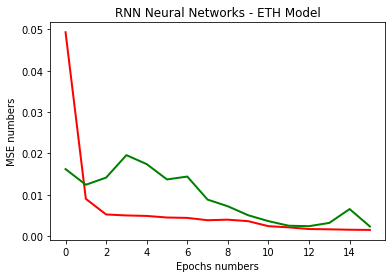

In [134]:
import matplotlib.pyplot as plt
plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('RNN Neural Networks - ETH Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

In [135]:
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

0.03979729297154955

In [136]:
from sklearn.metrics import mean_squared_error
SCORE_MSE=mean_squared_error(preds, y_test)
SCORE_MSE

0.0023235646943942415

In [137]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, preds)
r2_score*100

97.46824366723008

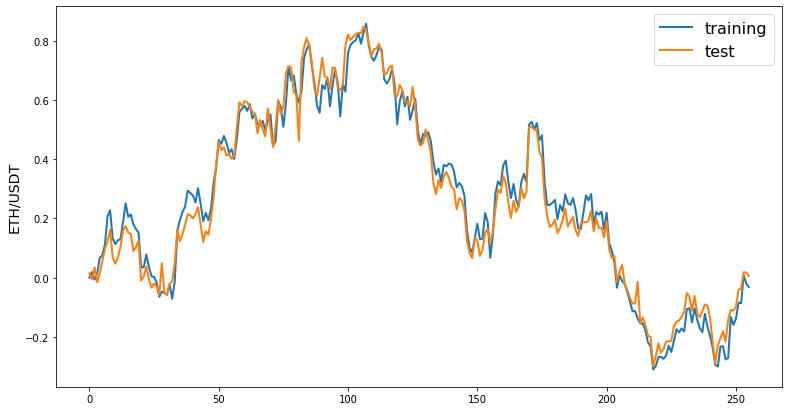

In [138]:
line_plot(y_test, preds, 'training', 'test', title='')

In [139]:
def test_normalise_zero_base(continuous):
    return continuous / continuous[0] - 1

In [140]:
prediction = np.array([2575.391602,2590.087891,2314.719238,26126395392])
prediction = test_normalise_zero_base(prediction)


In [149]:
prediction

array([[[ 0.00000000e+00,  5.70642887e-03, -1.01216593e-01,
          1.01446292e+07]]])

In [141]:
prediction = np.expand_dims(prediction, axis=0)

In [142]:
prediction = np.expand_dims(prediction, axis=0)

In [153]:
model.predict(prediction)
print("""-0.04899706 equeals of 2608.594277 USDT
Real ETH Value (for 2/24/2022) is 2562.79248 
Test Accuracy is %98.21 """)

-0.04899706 equeals of 2608.594277 USDT
Real ETH Value (for 2/24/2022) is 2562.79248 
Test Accuracy is %98.21 
